# Data Analyst Exam

## Table of Contents
<a id='contents'></a>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prep">Preparing the notebook and the data</a></li>
<li><a href="#q1">Question 1</a></li>
<li><a href="#q2">Question 2</a></li>
<li><a href="#q3">Question 3</a></li>
<li><a href="#q4">Question 4</a></li>
<li><a href="#q5">Question 5</a></li>
<li><a href="#q6">Question 6</a></li>
<li><a href="#q7">Question 7</a></li>
</ul>

## Introduction
<a id='intro'></a>

### Overview 

_This report represents my answers to the questions to the data exam. The analyzis will be conducted using Python via Jupyter Notebook. The description and justification of my steps will be provided in markdown cells along with the code blocks and vizualizations._

### Preliminary conditions

_According to the Exam Instructions file I need to keep in mind the following conditions:_

- _All answers should be given via summary tables._
- _The code should be followed with exceptional handling where applicable._
- _All the analysis should be conducted on the SKU with status 'Active' unless specified otherwise._

### Preparing the notebook and the data
<a id='prep'></a>

_First off, I will change the style of the tables so they look nicer, then I'll import all the necessary libraries and download the data. I'll put the data from 3 sheets into 3 different dataframes. After that I'll check if the data has any mistakes in it._

In [316]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;}

In [317]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sb
from calendar import month_abbr
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

In [318]:
def download_excel(file):
    """
    This function downloads an excel file as an object. 'file' - the filepath to the Excel file.
    """
    try:
        x = pd.ExcelFile(file)
    except Exception as e:
        print("Can't download the file", e.args[0])
    else:
        return x
    
xl = download_excel("Data (tables).xlsx")
xl.sheet_names
dfs = {sheet: xl.parse(sheet) for sheet in xl.sheet_names} # converting the excel object to a dataframe
dfinv, dfsku, dfdem = dfs['Inventory'], dfs['SKUMaster'], dfs['DemandHistory']

_Now, I'll give the data a quick look to see if there are any problems that need correction._

In [319]:
dfinv.head()

,SKU,UOM,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 14
0,110053,Units,489,186,278,279,506,440,293,303,130,537,518,100,
1,110054,Units,247,61,53,263,23,244,131,16,96,76,163,234,NaN
2,110056,Units,302,44,282,340,121,311,168,286,300,93,208,255,NaN
3,110124,Units,209,367,520,336,475,375,173,205,396,286,310,481,NaN
4,110125,Units,352,310,402,155,342,453,380,472,327,414,381,144,NaN


In [320]:
dfinv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22923 entries, 0 to 22922
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SKU          22923 non-null  int64 
 1   UOM          22923 non-null  object
 2   Jan          22923 non-null  int64 
 3   Feb          22923 non-null  int64 
 4   Mar          22923 non-null  int64 
 5   Apr          22923 non-null  int64 
 6   May          22923 non-null  int64 
 7   Jun          22923 non-null  int64 
 8   Jul          22923 non-null  int64 
 9   Aug          22923 non-null  int64 
 10  Sep          22923 non-null  int64 
 11  Oct          22923 non-null  int64 
 12  Nov          22923 non-null  int64 
 13  Dec          22923 non-null  int64 
 14  Unnamed: 14  1 non-null      object
dtypes: int64(13), object(2)
memory usage: 2.6+ MB


_I can see that one column ('Unnamed: 14') should be deleted since it doesn't carry any meaning for the anlaysis._

In [321]:
dfinv.drop('Unnamed: 14',1,inplace=True)

In [322]:
dfsku.head()

,SKU,CategoryCode,SKUStatus,SupplierNumber
0,110053,460,Active,3452
1,110054,460,Active,3452
2,110056,460,Active,3452
3,110124,460,Active,3452
4,110125,460,Active,3452


In [323]:
dfsku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22923 entries, 0 to 22922
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SKU             22923 non-null  int64 
 1   CategoryCode    22923 non-null  int64 
 2   SKUStatus       22923 non-null  object
 3   SupplierNumber  22923 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 716.5+ KB


In [324]:
dfdem.head()

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,Retail,559,1738,755,769,519,919,519,709,779,589,519,699
1,110053,GM$,333,790,452,457,309,547,309,422,459,350,309,416
2,110053,Units,56,234,75,77,52,92,52,71,79,59,52,70
3,110053,Weight,15,61,20,20,14,24,14,18,21,15,14,18
4,110053,Cube,1,5,1,1,1,2,1,1,2,1,1,1


In [325]:
dfdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114625 entries, 0 to 114624
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   SKU      114625 non-null  int64 
 1   Measure  114625 non-null  object
 2   Jan      114625 non-null  int64 
 3   Feb      114625 non-null  int64 
 4   Mar      114625 non-null  int64 
 5   Apr      114625 non-null  int64 
 6   May      114625 non-null  int64 
 7   Jun      114625 non-null  int64 
 8   Jul      114625 non-null  int64 
 9   Aug      114625 non-null  int64 
 10  Sep      114625 non-null  int64 
 11  Oct      114625 non-null  int64 
 12  Nov      114625 non-null  int64 
 13  Dec      114625 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 12.2+ MB


_Since the data in inventory and demand tables are denormalized I'll continue checking the data after completing Question 1. Now I'll filter the SKU table leaving only SKUs in Active status._

In [326]:
dfsku.SKUStatus.value_counts()

Active          9685
Discontinued    8329
Pre Active      4362
Seasonal         547
Name: SKUStatus, dtype: int64

In [327]:
SKU = dfsku[dfsku['SKUStatus']=='Active']

_Since there're 5 measure types and 22923 SKU records the demand table should contain 22923 * 5 = 114615 records which doesn't match with the actual number indicating a presence of duplicates. I'll check if there are any duplicates and in case they present I'll just delete them._

In [328]:
dfdem[dfdem.duplicated()].count()[0]

10

In [329]:
dfdem = dfdem.drop_duplicates()

### Question 1:
<a id='q1'></a>
_Normalize the inventory and demand history datasets for the following columns (i.e. combine the tables and make a flat dataset. Each data item listed below should have a column header)._
- _Demand Data: SKU, Month, Retail, GM, Units, Weight, Cube_
- _Inventory Data: SKU, Month, Units_

_First, I'll start normalizing the tables with unpivoting the inventory and the demand tables so that month columns become values._

In [330]:
def unpivot(df, id_vars):
    """
    This function takes a dataframe and unpivots it. 'df' - a pandas DataFrame, 
    'id_vars' - a column name/names that should be unpivoted. 
    """
    try:
        upvt = pd.melt(df, id_vars=id_vars, value_vars=list(df.columns[2:]),
                       var_name='Month', value_name='Units')
    except Exception as e:
        print("Can't unpivot the table", e.args[0])
    else:
        return upvt

In [331]:
inventory, demand = unpivot(dfinv,['SKU']), unpivot(dfdem,['SKU','Measure'])

In [332]:
inventory.head()

,SKU,Month,Units
0,110053,Jan,489
1,110054,Jan,247
2,110056,Jan,302
3,110124,Jan,209
4,110125,Jan,352


_The demand table also should be pivoted according to the Question 1. After doing that I'll check the data for the presence of any other mistakes._

In [333]:
demand = pd.pivot_table(demand, index=["SKU","Month"], values='Units', columns='Measure').reset_index()
demand.columns.name = None

In [334]:
demand.head()

,SKU,Month,Cube,GM$,Retail,Units,Weight
0,110053,Apr,1,457,769,77,20
1,110053,Aug,1,422,709,71,18
2,110053,Dec,1,416,699,70,18
3,110053,Feb,5,790,1738,234,61
4,110053,Jan,1,333,559,56,15


In [335]:
demand.describe()

,SKU,Cube,GM$,Retail,Units,Weight
count,2.750760e+05,275076.000000,275076.000000,275076.000000,275076.000000,275076.000000
mean,7.594275e+06,19.525211,749.077513,1487.168154,125.935854,311.691074
std,1.902289e+06,147.118973,2109.564652,4876.530437,581.353450,2160.912707
min,1.100530e+05,-196.000000,-9290.000000,-5880.000000,-596.000000,-2440.000000
25%,8.092744e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.297392e+06,0.000000,85.000000,175.000000,16.000000,9.000000
75%,8.404212e+06,4.000000,646.000000,1125.000000,88.000000,83.000000
max,8.495053e+06,17413.000000,86880.000000,260455.000000,55957.000000,243200.000000


In [336]:
inventory.describe()

,SKU,Units
count,2.750760e+05,275076.000000
mean,7.594275e+06,421.047820
std,1.902289e+06,4174.096228
min,1.100530e+05,-1092.000000
25%,8.092744e+06,0.000000
50%,8.297392e+06,38.000000
75%,8.404212e+06,257.000000
max,8.495053e+06,579381.000000


In [337]:
SKU.describe()

,SKU,CategoryCode,SupplierNumber
count,9.685000e+03,9685.000000,9685.000000
mean,7.075626e+06,363.037687,28066.032421
std,2.301819e+06,56.706225,29227.949871
min,1.100530e+05,200.000000,46.000000
25%,8.004380e+06,330.000000,2953.000000
50%,8.184632e+06,360.000000,16934.000000
75%,8.343410e+06,380.000000,52070.000000
max,8.491441e+06,700.000000,999999.000000


_Now I can see that the demand and the inventory tables have negative values. That looks unusual since such measures as Units and Weight can't be negative. Since I'm not sure how that data appeared in the tables I decided to delete them and continue analysis without that data for now._ 

In [338]:
demand.rename(columns = {'GM$':'GM'}, inplace=True)

In [339]:
inventory = inventory[~inventory['Units'] < 0]

In [340]:
demand = demand[~((demand['Cube']<0)|(demand['GM']<0)|(demand['Retail']<0)|(demand['Units']<0)|(demand['Weight']<0))]

_Checking if the tablers are properly cleaned._

In [341]:
inventory[inventory['Units'] < 0]

,SKU,Month,Units


In [342]:
demand[(demand['Cube']<0)|(demand['GM']<0)|(demand['Retail']<0)|(demand['Units']<0)|(demand['Weight']<0)]

,SKU,Month,Cube,GM,Retail,Units,Weight


### Question 2:
<a id='q2'></a>
_Rank CategoryCodes and SupplierCodes in descending order by any of the five measures (Retail, GM, Units, Weight and Cube)._

_Since ranked columns and measures are located in different tables I'll combine them into 1 table first by a common column - 'SKU'. I'll use inner join since I need to analyze only SKUs in 'Active' status._

In [343]:
SKU_dem = SKU.merge(demand, left_on = 'SKU', right_on = 'SKU', how='inner')

_I'll use a lambda function to create a template for grouping the data on 2 columns. I chose to group on 'Units' column since it represents the volume of sold SKUs which I see as an important metric. After the data is grouped I'll display top 10 Categories Codes and Supply Numbers._

In [344]:
order_asc = lambda x : SKU_dem.groupby(x)['Units'].sum().rank(ascending=0).sort_values()

In [345]:
CatCode, SupNum = [order_asc(i).astype(int) for i in ['CategoryCode','SupplierNumber']]

In [346]:
print(CatCode[:10])
print('-'*30)
print(SupNum[:10])

CategoryCode
380     1
360     2
330     3
310     4
340     5
370     6
320     7
460     8
400     9
410    10
Name: Units, dtype: int64
------------------------------
SupplierNumber
52070     1
46        2
51726     3
16934     4
824       5
95        6
3801      7
37145     8
16940     9
88111    10
Name: Units, dtype: int64


### Question 3:
<a id='q3'></a>
_Calculate total average inventory by Category code and SupplierNumber in terms of RetailPrice, GM, Weight, Cube._

_I'll use a lambda function to group by required columns to find the average._

In [347]:
find_avg = lambda x, y : SKU_dem.groupby(x)[y].mean()

In [348]:
cat_list = [(x, y) for x in ['CategoryCode', 'SupplierNumber'] for y in ['Retail', 'GM', 'Weight', 'Cube']]

In [349]:
CAR, CAG, CAW, CAC, SNR, SNG, SNW, SNC = [find_avg(x[0], x[1]) for x in cat_list]

_I'll create 2 dataframes containing answers to the Question 3. I'll find the average grouped by CategoryCode and SupplierNumber as stated in the Question 3. I'll use a lambda function again for easier creating of dataframes._

In [350]:
tot_avg_cat = CAR.reset_index()
cat = lambda x: tot_avg_cat.merge(x.reset_index(), left_on = 'CategoryCode', 
                                  right_on = 'CategoryCode', how='inner')
for i in [CAG, CAW, CAC]:
    tot_avg_cat = cat(i)
tot_avg_cat.head()

,CategoryCode,Retail,GM,Weight,Cube
0,200,1009.001950,610.377772,75.781136,4.516208
1,310,4128.977171,2398.569301,892.528753,49.283835
2,320,3613.358591,1829.435052,903.891753,36.783849
3,330,4673.274981,2343.392554,1565.957658,81.027296
4,340,3044.081933,1426.040497,399.244860,38.670702


In [351]:
tot_avg_sup = SNR.reset_index()
sup = lambda x: tot_avg_sup.merge(x.reset_index(), left_on = 'SupplierNumber',
                                  right_on = 'SupplierNumber', how='inner')
for i in [SNG, SNW, SNC]:
    tot_avg_sup = sup(i)
tot_avg_sup.head()

,SupplierNumber,Retail,GM,Weight,Cube
0,46,558.896484,449.235026,98.678385,2.810547
1,74,3594.546296,1600.949074,151.407407,3.402778
2,95,1488.462963,997.949805,183.299951,12.721735
3,113,5146.055556,2102.291667,623.611111,17.652778
4,122,720.500000,429.633333,27.483333,0.683333


### Question 4:
<a id='q4'></a>
_Calculate the Weighted average of RetailPrice, GM, Weight, and Cube per Unit from Demand Data. Apply these values as new columns in SKUMaster data. Calculate same values by CategoryCode and SupplierNumber._

In [352]:
pairs = [(x, y) for x in ['SKU', 'CategoryCode', 'SupplierNumber']for y in ['Retail', 'GM', 'Cube', 'Weight']]

In [353]:
SKU_avg = SKU.copy()

_I'll create a function for creating easier producting a dataframe containing the answer to the Question 4. In this question I understand 'Weighted' average as the total per SKU, CategoryCode or SupplierNumber._

In [354]:
def weight_avg(col):
    """
    This function calculates weighted average based on entered column from SKU_dem table. 
    'col' - tuple.
    """
    try:
        x = SKU_dem.groupby(col[0])[col[1]].sum()/SKU_dem.groupby(col[0])['Units'].sum()
    except Exception as e:
        print("Incorrect column name", e.args[0])
    else:
        x[x.isna()] = 0
        return x

_I'll create a loop for easier renaming columns and a lambda function combined with a loop for easier connecting new columns to the SKU dataframe._

In [355]:
firms = AR, AG, AC, AW, ACR, ACG, ACC, ACW, ASR, ASG, ASC, ASW = \
    [weight_avg(x).to_frame().reset_index() for x in pairs]
labels = [f'Avg_{i[0]}_{i[1]}' for i in pairs]

In [356]:
for x, y in zip(firms, labels):
    x.rename(columns={0:y}, inplace=True)
mrg = lambda x, y: SKU_avg.merge(x, left_on = y, right_on = y, how='inner')

In [357]:
for x, y in enumerate(firms):
    if x < 4:
        SKU_avg = mrg(y, 'SKU')
    elif x <=7:
        SKU_avg = mrg(y, 'CategoryCode')
    else:
        SKU_avg = mrg(y, 'SupplierNumber')

In [358]:
SKU_avg.head()

,SKU,CategoryCode,SKUStatus,SupplierNumber,Avg_SKU_Retail,Avg_SKU_GM,Avg_SKU_Cube,Avg_SKU_Weight,Avg_CategoryCode_Retail,Avg_CategoryCode_GM,Avg_CategoryCode_Cube,Avg_CategoryCode_Weight,Avg_SupplierNumber_Retail,Avg_SupplierNumber_GM,Avg_SupplierNumber_Cube,Avg_SupplierNumber_Weight
0,110053,460,Active,3452,9.363261,5.317853,0.018576,0.262126,11.987968,5.872893,0.072916,1.614021,11.801891,6.278695,0.04082,1.787374
1,110054,460,Active,3452,9.221893,5.168639,0.023669,0.220414,11.987968,5.872893,0.072916,1.614021,11.801891,6.278695,0.04082,1.787374
2,110056,460,Active,3452,9.486577,5.132550,0.020134,0.281879,11.987968,5.872893,0.072916,1.614021,11.801891,6.278695,0.04082,1.787374
3,110124,460,Active,3452,8.870040,5.140886,0.006901,0.559517,11.987968,5.872893,0.072916,1.614021,11.801891,6.278695,0.04082,1.787374
4,110125,460,Active,3452,8.864600,5.240620,0.008972,0.579935,11.987968,5.872893,0.072916,1.614021,11.801891,6.278695,0.04082,1.787374


### Question 5:
<a id='q5'></a>
_In each CategoryCode, find the SKUs which make-up top 80% of volume in terms of RetailPrice. E.g. if there are 10 unique CategoryCodes in the SKUMaster.csv table then find the SKUs which make up the top 80% of each category in terms of retail price._

_In order to obtain the top 80% percent I'll use a rank percentile function so that the SKUs are presented as the percentiles according to their RetailPrice value._

In [359]:
SKU80 = SKU_dem[['CategoryCode', 'SKU', 'Retail']]
SKUGrp = SKU80.groupby(['CategoryCode', 'SKU']).sum().sort_values(['CategoryCode', 'Retail'])
SKUGrp = SKUGrp.groupby('CategoryCode').rank(pct=1)
SKUtop80 = SKUGrp[SKUGrp>0.2].dropna().reset_index().sort_values(['CategoryCode', 'Retail'], ascending=[1,0])

_Since it's not specified how many SKUs should be displayed, I retrieved all of them to be able to dive deep and find out which SKUs contribute to the retail price._

In [360]:
SKUtop80.head(10).style.format({'Retail':'{:.2%}'})

,CategoryCode,SKU,Retail
273,200,8442147,100.00%
272,200,8000314,99.71%
271,200,8315327,99.42%
270,200,8170045,99.12%
269,200,8022418,98.83%
268,200,8180325,98.54%
267,200,8410524,98.25%
266,200,8461808,97.95%
265,200,8315301,97.66%
264,200,8442089,97.37%


### Question 6:
<a id='q6'></a>
_Analyze if there is any seasonality in overall volumes over the year and also seasonality among CategoryCodes._

_To find out if there's any seasonality present I decided to plot the GM, Units and Retail as the most important metrics which change over time can provide valuable information. I'll start with a simple line plot, then I'll see the treind in the breakdown of CategoryCode and then I'll investigate the autocorrelation. First, I'll convert text Month data to categorical and order it by month abbreviations. Note: I took sums of GM and Units to get the overall volume and the average of Retail to see how the actual Retail changes._

In [361]:
Seas = SKU_dem.copy()
Seas.Month = pd.Categorical(Seas.Month, month_abbr[1:])
sb.set_style("whitegrid")

In [362]:
def grouper(m):
    """
    This function creates dataframes with summed GM and Units columns
    and adds averaged Retail column.
    """
    try:
        x = Seas.groupby(m)[['GM','Units']].sum().reset_index()
        x['Retail'] = Seas.groupby(m)['Retail'].mean().transform(list)
    except Exception as e:
        print("Can't create a dataframe", e.args[0])
    else:
        return x

In [363]:
MG,CG = grouper('Month'), grouper(['Month','CategoryCode'])
CG.CategoryCode = pd.Categorical(CG.CategoryCode)

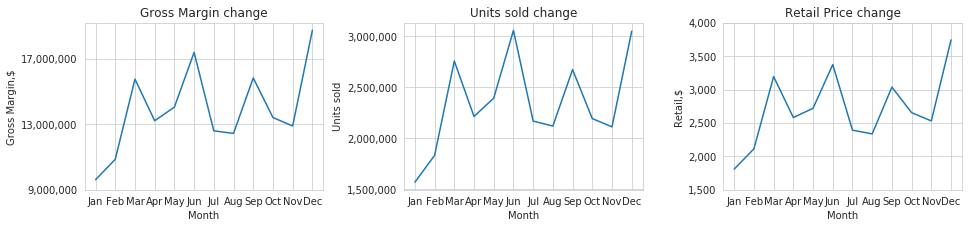

In [364]:
fig, ax = plt.subplots(1, 3, figsize = (14, 4))
fig.tight_layout(pad=5.0)
y0, y1, y2 = \
range(int(9e6), int(20e6)+1, int(4e6)), range(int(15e5), int(3.5e6), int(5e5)), range(1500, 4001, 500)

for x, y in enumerate(MG.columns[1:]):
    sb.lineplot(data=MG, x='Month', y=y, ax=ax[x], sort=1, ci=0)
    
for x, y in enumerate(['Gross Margin change', 'Units sold change', 'Retail Price change']):
    ax[x].title.set_text(y)
    
for x, y in enumerate(['Gross Margin,$', 'Units sold', 'Retail,$']):
    ax[x].set_ylabel(y)
    
for x, y in enumerate([y0, y1, y2]):
    ax[x].set_yticks(y)
    ax[x].set_yticklabels([f'{i:,d}' for i in y])

_As we can see from the charts there are spikes in March, June, September and December which might indicate that the data has a seasonal component. Now I'll look closer on CategoryCode trends._

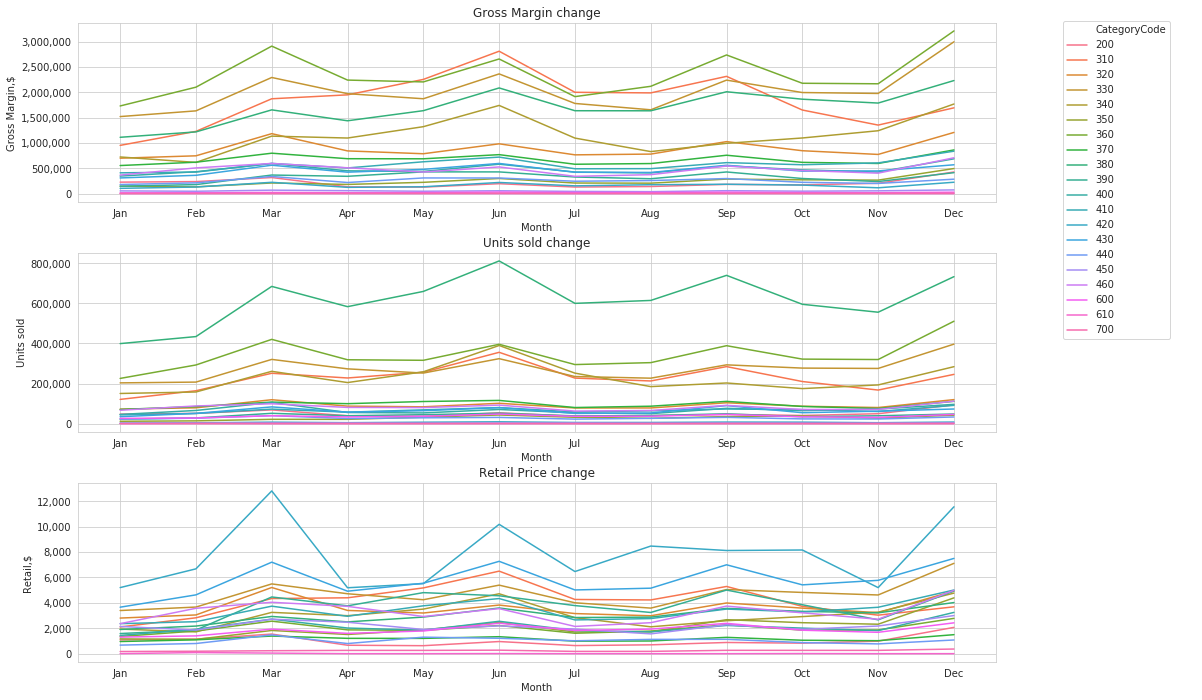

In [365]:
fig, ax = plt.subplots(3, 1, figsize = (14, 10))
fig.tight_layout(pad=3.0)
y3,y4,y5 = \
range(0, int(3e6)+1, int(5e5)), range(0, int(8e5)+1, int(2e5)), range(0, 12001, 2000)

for x, y in enumerate(CG.columns[2:]):
    sb.set_style("whitegrid")
    pl = sb.lineplot(data=CG, x='Month', y=y, ax=ax[x], sort=1, ci=0, hue='CategoryCode')
    pl.get_legend().remove()
handles, labels = pl.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.95), loc='upper left')

for x,y in enumerate(['Gross Margin change', 'Units sold change', 'Retail Price change']):
    ax[x].title.set_text(y)
    
for x,y in enumerate(['Gross Margin,$', 'Units sold', 'Retail,$']):
    ax[x].set_ylabel(y)
    
for x,y in enumerate([y3, y4, y5]):
    ax[x].set_yticks(y)
    ax[x].set_yticklabels([f'{i:,d}' for i in y]);

_As we can see from these charts, after breaking down into separate CategoryCodes the seasonal component can still be observed. Another insight that we can see here that the SKUs with high volume of Units sold or Retail are more volatile in terms of changing the metric that the SKUs with lower volumes. And the last, I will check the seasonal component on autocorrelation plots._

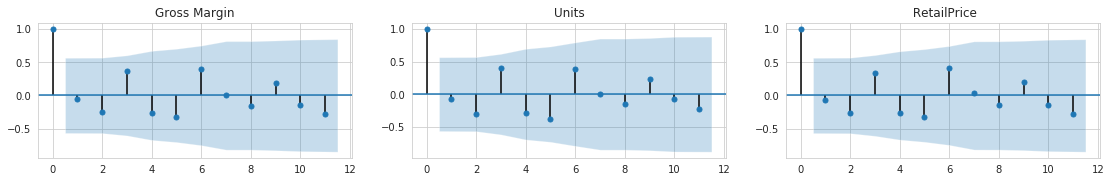

In [366]:
fig, ax = plt.subplots(1,3,figsize=(16,3))
fig.tight_layout(pad=3.0)
for x, y in enumerate(MG.columns[1:]):
    ar = plot_acf(MG[y], lags=11, alpha = .05, ax=ax[x])
for x, y in enumerate(['Gross Margin', 'Units',' RetailPrice']):
    ax[x].title.set_text(y)

_The plots show a weak positive and negative correlations with lags from 2 to 6. The results are statistically significant with alpha = .05 which means that we can't conclude that the data is not correlated. Also it worth noting that autocorrelation is the strongest on lags 3 and 6 which could mean quarter cycles. Answering on the question - yes, there is evidence that the seasonality is present in this dataset._  

### Question 7:
<a id='q7'></a>
_Generate a Pareto by SKU (in terms of Retailprice) and see how many SKUs account for top 80%, next 15%, and bottom 5% of the sales._

_In order to answer this question I'll first construct a Pareto chart and then I'll find how many SKUs are located on the given percentage borders._

In [367]:
x1 = SKU_dem[['SKU', 'Retail']].copy()

In [368]:
Par = x1.groupby('SKU').sum().sort_values('Retail', ascending=0).reset_index()

_Creating a y-axis for a Pareto chart._

In [369]:
Par['Percent'] = Par.Retail.cumsum()/Par.Retail.sum()*100

_Creating a x-axis for a Pareto chart._

In [370]:
Par['Count'] = np.array(Par.index) + 1

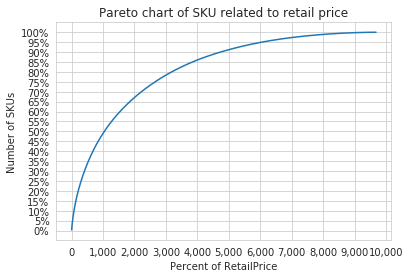

In [371]:
x = sb.lineplot(Par.Count,Par.Percent)
z = range(0, 101, 5)
z1 = range(0, 10001, 1000)
plt.yticks(z, [f'{i/100:.0%}' for i in z])
plt.xticks(z1, [f'{i:,d}' for i in z1])
plt.xlabel('Percent of RetailPrice')
plt.ylabel('Number of SKUs')
plt.title('Pareto chart of SKU related to retail price');

In [372]:
_5per, _20per, rest = [Par[Par['Percent']<=5].shape[0],
                       Par[Par['Percent'].between(5, 20, inclusive=False)].shape[0],
                       Par[Par['Percent']>=20].shape[0]]

In [373]:
print(f"There're {rest:} of SKUs account for top 80%, {_20per:} account for the next 15% and {_5per} account for the rest 5%.")

There're 9476 of SKUs account for top 80%, 181 account for the next 15% and 28 account for the rest 5%.
